<div style="border:solid green 2px; padding: 20px">
    
<b>Hello, Paul!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

# Sprint 7 Project: Introduction to Machine Learning

## Introduction and Background

I am an analyst for mobile carrier Megaline. My company has found out that many of our subscribers use legacy plans, and we would like to recommend one of our newer plans (Smart and Ultra) to each. To determine which plan is appropriate for each customer, I will develop a model to analyze subscribers' behavior and select the best plan for them.

I have access to behavior data about subscribers who have already switched to one of these new plans. This data has already been prepared and preprocessed to use for modeling.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). 

In [2]:
# Import libraries required for the modeling
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Always show all columns when displaying dataframes
pd.set_option('display.max_columns', None)

In [3]:
# Read CSV as a dataframe
df = pd.read_csv('users_behavior.csv')

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__
    
Some blocks of code are not working. Please see what went wrong. Before submitting a project, you should check if the code works - you can do this by clicking on the Jupiter Hub Kernel and Restart & Run All panels    

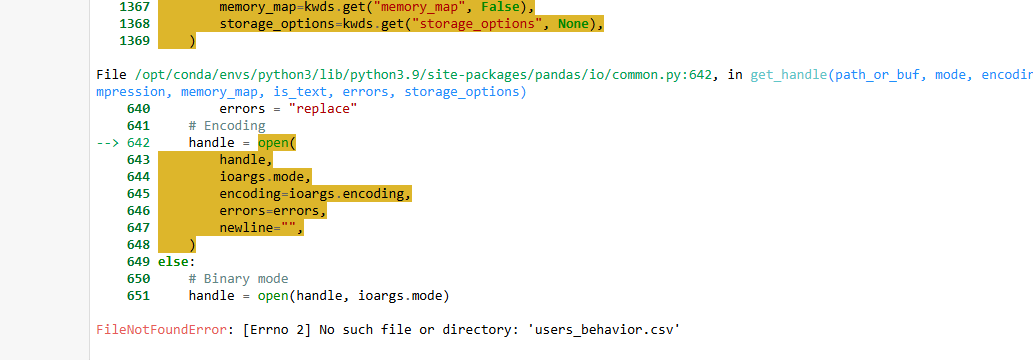

In [3]:
# Summarize the dataframe
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0


As explained above, this data has already been preprocessed and is ready for my modeling. To summarize:
- There are no missing values as all columns contain 3214 rows of data.
- The data types are correct: Calls, minutes, messages, and MB used are all floats, while the plan type is an integer (0 or 1).
- Messages would technically be better as an integer, since there are no fractions involved in this column, but it will not affect my modeling to leave it as an integer here.
- A value of is_ultra of 0 represents the Smart plan, while a value of 1 represents the Ultra plan.

Overview of the data:
- *calls*: number of calls
- *minutes*: total call duration in minutes
- *messages*: number of text messages
- *mb_used*: Internet traffic used in MB
- *is_ultra*: plan for the current month (Ultra - 1, Smart - 0)

I will do some basic statistical analysis of the dataset to check basic attributes and outliers.

In [4]:
# Basic statistical summary of the dataset
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


array([[<AxesSubplot:title={'center':'calls'}>,
        <AxesSubplot:title={'center':'minutes'}>],
       [<AxesSubplot:title={'center':'messages'}>,
        <AxesSubplot:title={'center':'mb_used'}>],
       [<AxesSubplot:title={'center':'is_ultra'}>, <AxesSubplot:>]],
      dtype=object)

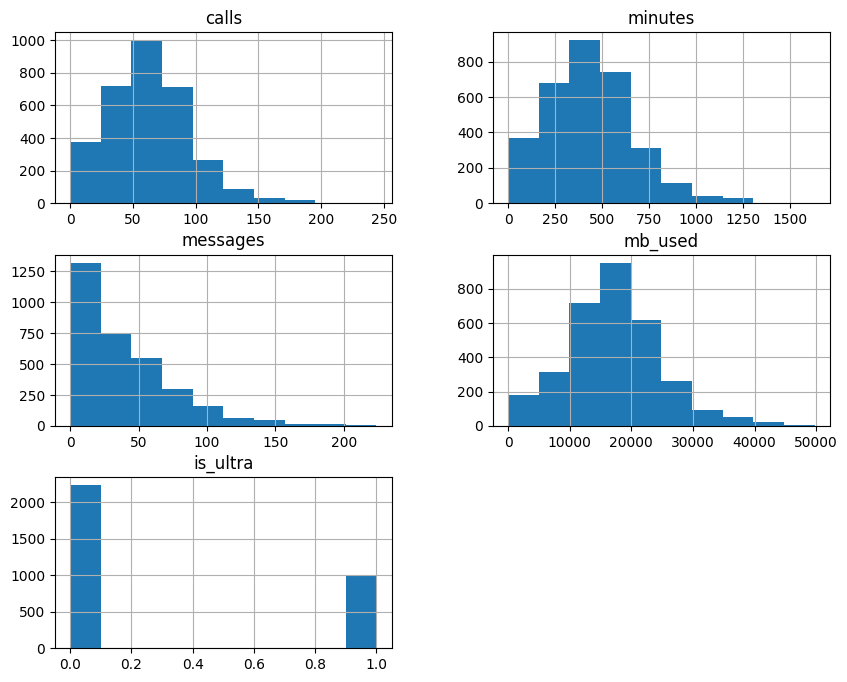

In [5]:
# Making a quick histogram for each column to check distribution of data
df.hist(figsize=(10, 8))

After reviewing the histograms some basic observations can be made:
- Calls, Minutes, and mb_used have fairly normal distributions
- Messages is skewed to the right
- There are over twice as many Smart plan users than Ultra plan users

## Creating the Model

### Preparing Datasets

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__


Great. First look at the data is done

In [6]:
# Splitting the dataset into training set, validation set, and test set
# Since we have to split the dataset into 3, I will first split it into a training set (60%) and temporary set (40%)
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=12345)
# I will then split the temporary set into a validation set and test set (each 20% of the total)
df_valid, df_test = train_test_split(df_temp, test_size=0.5, random_state=12345)
# Double checking the size of each resulting dataframe for correctness, as a percentage of the original dataframe
print(f'Percentage of original data in training dataset: {df_train.shape[0] / df.shape[0] * 100}')
print(f'Percentage of original data in validation dataset: {df_valid.shape[0] / df.shape[0] * 100}')
print(f'Percentage of original data in test dataset: {df_test.shape[0] / df.shape[0] * 100}')

Percentage of original data in training dataset: 59.98755444928439
Percentage of original data in validation dataset: 20.00622277535781
Percentage of original data in test dataset: 20.00622277535781


In [7]:
# Preparing datasets by splitting into target and features
# The target is which plan the user has for the current month (is_ultra) - this will parallel our model for recommending a new plan to customers using a legacy plan
# The features are all the other columns besides is_ultra
target_train = df_train['is_ultra']
target_valid = df_valid['is_ultra']
target_test = df_test['is_ultra']
features_train = df_train.drop(['is_ultra'], axis=1)
features_valid= df_valid.drop(['is_ultra'], axis=1)
features_test = df_test.drop(['is_ultra'], axis=1)

# Checking the shapes of the resulting dataframes for accuracy
print(features_train.shape)  # 60% data, 4 columns
print(target_train.shape)    # 60% data, 1 column
# Validation
print(features_valid.shape)  # 20% data, 4 columns
print(target_valid.shape)    # 20% data, 1 column
# Test
print(features_test.shape)  # 20% data, 4 columns
print(target_test.shape)    # 20% data, 1 column

(1928, 4)
(1928,)
(643, 4)
(643,)
(643, 4)
(643,)


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__



1. It is good here, random_state is fixed. We have ensured reproducibility of the results of splitting the sample into training (training) / test / validation samples, so the subsamples will be identical in all subsequent runs of our code.
    
2. Fraction of train/valid/test sizes 3:1:1 is good.

### Selecting Best Model and Hyperparameters

I will create potential models using three learning algorithms for classification:
- DecisionTreeClassifier
- RandomForestClassifier
- Logistic Regression

I will also adjust the hyperparameters of each algorithm to determine which one is the best model for the data. The goal is the highest possible accuracy of the model. I will be using an accuracy threshold of 0.75.

In [8]:
# Creating DecisionTreeClassifier model
# I'm testing depths of 1-50 arbitrarily
# I will test with the validation dataset for now. Later on I will instead use the test dataset on my chosen model
# Starting with a depth of 0 we will see which model produces the highest accuracy
best_depth_tree = 0
# Our minimum threshold for accuracy is 0.75 so I will use this as my starting point
best_accuracy_tree = 0.75

for depth in range(1, 51): # Testing depths of 1 to 50
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # Creating the model
    model.fit(features_train, target_train) # Training the model
    prediction_tree = model.predict(features_valid) # Using the model to make a prediction about the validation dataset

    accuracy_tree = accuracy_score(target_valid, prediction_tree) # Calculating accuracy
    if accuracy_tree > best_accuracy_tree: # Seeing which model provides the highest accuracy
        best_depth_tree = depth
        best_accuracy_tree = accuracy_tree
print(f'Best DecisionTreeClassifier depth: {best_depth_tree}')
print(f'Best DecisionTreeClassifier accuracy: {best_accuracy_tree}')

Best DecisionTreeClassifier depth: 3
Best DecisionTreeClassifier accuracy: 0.7853810264385692


In [9]:
# Creating RandomForestClassifier model
# I'm testing estimators of 1-50 arbitrarily
# I will test with the validation dataset for now. Later on I will instead use the test dataset on my chosen model
# Starting with a n_estimators value of 0 we will see which model produces the highest accuracy
best_est_forest = 0
# Our minimum threshold for accuracy is 0.75 so I will use this as my starting point
best_accuracy_forest = 0.75

for est in range(1, 51): # Testing n_estimators of 1 to 50
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # Creating the model
    model.fit(features_train, target_train) # Training the model
    prediction_forest = model.predict(features_valid) # Using the model to make a prediction about the validation dataset
  
    accuracy_forest = accuracy_score(target_valid, prediction_forest) # Calculating accuracy
    if accuracy_forest > best_accuracy_forest: # Seeing which model provides the highest accuracy
        best_est_forest = est
        best_accuracy_forest = accuracy_forest
print(f'Best RandomForestClassifier n_estimators: {best_est_forest}')
print(f'Best RandomForestClassifier accuracy: {best_accuracy_forest}')

Best RandomForestClassifier n_estimators: 23
Best RandomForestClassifier accuracy: 0.7947122861586314


In [10]:
# Creating LogisticRegression model
# I will test with the validation dataset for now. Later on I will instead use the test dataset on my chosen model
# Our minimum threshold for accuracy is 0.75 so I will use this as my starting point
best_accuracy_logic = 0.75

model_logic = LogisticRegression(random_state=12345, solver='liblinear') # Creating the model
model_logic.fit(features_train, target_train) # Training the model
prediction_logic = model_logic.predict(features_valid) # Using the model to make a prediction about the validation dataset

# Calculating and printing accuracy
accuracy_logic = accuracy_score(target_valid, prediction_logic)
print(f'Logistic Regression accuracy: {accuracy_logic}')

Logistic Regression accuracy: 0.7589424572317263


### Testing the Best Model

I have selected the Random Forest Classifier model with a n_estimators value of 23 since it has the highest accuracy (79.5%).

I will now use this model to generate predictions about the test dataset.

In [11]:
# Recreating the RandomForestClassifier model above as my final model with normally named variables to avoid confusion
final_model = RandomForestClassifier(random_state=12345, n_estimators=23) # Creating the model with n_estimators = 23 from above testing
final_model.fit(features_train, target_train) # Training the model
prediction = final_model.predict(features_test) # Using the model to make a prediction about the test dataset
  
accuracy = accuracy_score(target_test, prediction) # Calculating accuracy of test dataset vs. new prediction
print(f'Final Model accuracy: {accuracy}')

Final Model accuracy: 0.7807153965785381


### Accuracy of Final Model

The final model has an accuracy of 78.1% when making predictions about the test dataset, while it had an accuracy of 79.5% while predicting the validation dataset. These two accuracies aren't terribly different from each other, therefore I believe it could potentially be a reasonable model for the data.

However, this demonstrates an accuracy below that of the Decision Tree Classifier model with depth 3 (78.5%) from my earlier testing. Further investigation may be required to see if the Decision Tree Classifier could be a potentially more accurate model. Its accuracy remains higher than the Logistic Regression model (75.9%).

### Reviewing the Final Model

I will now do a review on the final model to see if it makes sense to use as a predictor of what plan customers chose. I will use the following basic approaches for this:
- Comparison of prediction accuracy to binary random chance (50% per plan)
- Comparison of prediction accuracy to frequency of each plan in the total dataset
- Observations about the initial dataset
- Observations about the final model

In [12]:
# Displaying frequency of each plan in the overall dataset and percentage of customers with Ultra plan
# This is equal to taking the mean of the is_ultra column, which I realized after doing it
ultra_freq = len(df[df['is_ultra'] == 1]['is_ultra'])
smart_freq = len(df[df['is_ultra'] == 0]['is_ultra'])
percentage_ultra = ultra_freq / (ultra_freq + smart_freq) * 100
print(f'Number of customers with Ultra plan: {ultra_freq}')
print(f'Number of customers with Smart plan: {smart_freq}')
print(f'Percentage of customers with Ultra plan: {percentage_ultra:.1f}')      

Number of customers with Ultra plan: 985
Number of customers with Smart plan: 2229
Percentage of customers with Ultra plan: 30.6


I will now follow up on my review approaches above:
- An accuracy of 78.1% is far greater than that of random binary chance (50%), therefore this model is at least better than using random chance.
- 69.4% of users in the dataset are currently using the Smart plan. It warrants further investigation since the accuracy of the final model is only somewhat greater than this percentage.
- The final model I ended up choosing has an n_estimators value of 23. This struck me as rather high for a dataset with only 4 features (calls, minutes, messages, and mb_used).
- The right skew of the messages may have an impact on the model - the other 3 variables are relatively normally distributed.
- Additionally, it would help to know the features of the Ultra and Smart plans in order to be able to cross-reference the dataset and further analyze the model.

## Conclusion

Mobile carrier Megaline has discovered that many of their subscribers still use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra. This would streamline each user's experience and also generate higher revenue. 

After testing and tuning a few classification models on behavioral data about subscribers who have already switched to the new plans, I would suggest to Megaline to implement a Random Forest Classification Model (with n_estimators 23) in order to predict the most likely plan for subscribers on legacy plans to consider purchasing. This model had the highest accuracy of all three classification models and is above the acceptable accuracy threshold of 75%.

There are likely more accurate models to predict this particular data, and as such, further investigation is needed.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Here's the great thing: we picked the best hyperparameters for all our models (in this case, maximizing the accuracy_score metric). Here we also identified the MOST optimal model. On validation, it turned out to be the "random forest" model.

After the hyperparameters are selected for validation, we test the models on the test data. Based on the results of testing on the test (sorry for the tautalogy), we choose a model that we can pass to production.